In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\Azadeh\Data Science-Lighthouse\Datasets\mini-project-V\train.csv\train.csv")

### Exploration

In [1]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# checking the distribution of classes

df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [6]:
# Checking null values

df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df = df.dropna(how='any',axis=0) 

<AxesSubplot:xlabel='is_duplicate'>

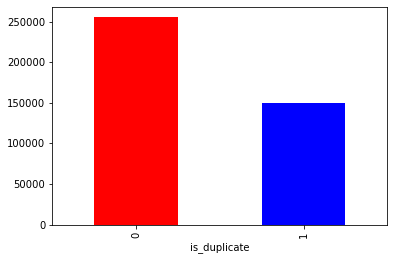

In [9]:
# Visualizing the distribution of classes

df.groupby("is_duplicate")['id'].count().plot.bar(color={"red", "blue"})


In [2]:
# Analyzing the data set

for i in range(0,10):
    print(df.question1[i])
    print(df.question2[i])
    print()
    
for i in range(20,30):
    print(df.question1[i])
    print(df.question2[i])
    print()

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [12]:
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def clean(text, stem_words=True):
    import re
    from string import punctuation
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords
    
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''

#    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.
    
    # Empty question
    
    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
   
    # add padding to punctuations and special chars, we still need them later
    
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    
      
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    # indian dollar
    
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
  
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text
    
df['question1'] = df['question1'].apply(clean)
df['question2'] = df['question2'].apply(clean)

In [17]:
import string
import re
import unidecode
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


In [ ]:
# remove white spaces
import re 
def remove_white_space(text):
    sentence = re.sub(' +',' ', text)
    return sentence

In [ ]:
# function to remove puctuations
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [18]:
# Remove stopwords
# Load the list of stopwords built into nltk

stopwords = nltk.corpus.stopwords.words('english')

# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

In [ ]:
# Stemming
def stemmizer(tokenized_text):
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokenized_text]
    return stemmed

In [ ]:
# Normalizing the data:
def Normalize(data):
    
        data['question1']=  data['question1'].apply(lambda x: remove_white_space(x))
        data['question2']=  data['question1'].apply(lambda x: remove_white_space(x))
        
        data['question1']=  data['question1'].apply(lambda x: unidecode.unidecode(x))
        data['question2']=  data['question2'].apply(lambda x: unidecode.unidecode(x))
        
        data['question1']=  data['question1'].apply(lambda x: remove_punct(x))
        data['question2']=  data['question2'].apply(lambda x: remove_punct(x))
        
        #data['question1']=  data['question1'].apply(lambda x: word_tokenize(x.lower()))
        #data['question2']=  data['question2'].apply(lambda x: word_tokenize(x.lower()))
        
        #data['question1']=  data['question1'].apply(lambda x: remove_stopwords(x))
        #data['question2']=  data['question2'].apply(lambda x: remove_stopwords(x))
        
        #data['question1']=  data['question1'].apply(lambda x: stemmizer(x))
        #data['question2']=  data['question2'].apply(lambda x: stemmizer(x))
        
        return data

In [ ]:
#df_norm= Normalize(df) 
#df_norm

In [ ]:
#X_train['question1_clean']=  X_train['question1_clean'].apply(lambda x: stemmizer(x))
#X_train['question1_clean']

In [ ]:
#df_train.to_csv()

### Feature Engineering

- tf-idf
- Bag Of Words

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- Naive Bayes classifier

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# TFIDF technique with XGboost and Naive Bayes

In [28]:
tfidf = TfidfVectorizer(analyzer='word', min_df = 2, stop_words = stopwords)

tfidf.fit(pd.concat((df['question1'],df['question2'])).unique())
trainq1_trans = tfidf.transform(df['question1'].values)
trainq2_trans = tfidf.transform(df['question2'].values)


X = hstack((trainq1_trans,trainq2_trans))
y = df['is_duplicate'].values

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

xgb_model = xgb.XGBClassifier(objective ='binary:logistic', max_depth=50, n_estimators=80, learning_rate=0.1,use_label_encoder=False,eval_metric='logloss').fit(X_train, y_train) 

xgb_prediction = xgb_model.predict(X_test)



In [47]:
#d = tfidf.vocabulary_
df_tfidf= pd.DataFrame({'vocabulary': tfidf.vocabulary_})
#tfidf.get_feature_names_out()
df_tfidf.tail()

,vocabulary
zynga,50217
zyrtec,50218
zyzz,50219
zz,50220
zzzquil,50221


In [41]:
#tfidf.get_feature_names()

In [29]:
print('tf-idf training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('tf-idf test score:', f1_score(y_test, xgb_model.predict(X_test), average='macro'))
print(classification_report(y_test, xgb_prediction))
print()
print("Accuracy on training set for XGBoost(n=80,depth=50): {:.3f}".format(xg_reg.score(X_train, y_train)))

tf-idf training score: 0.8147011558699784
tf-idf test score: 0.7281241882941261
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     51026
           1       0.82      0.50      0.62     29832

    accuracy                           0.77     80858
   macro avg       0.79      0.72      0.73     80858
weighted avg       0.78      0.77      0.76     80858


Accuracy on training set for XGBoost(n=80,depth=50): 0.382


The **recall** means "how many of this class you find over the whole number of element of this class"

The **precision** will be "how many are correctly classified among that class"

The **f1-score** is the harmonic mean between precision & recall

The **support** is the number of occurence of the given class in your dataset 

# Naive Bayes 

In [33]:
 
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB #because binary 

NB= BernoulliNB()

model = NB.fit(X_train, y_train)
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)



In [34]:
#print(classification_report(y_test,lg_prediction))
print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')

Train accuracy:	0.7575696675313592
Test accuracy:	0.7283385688490934


# Bag of words with XGBoost and Naive Bayes 


In [37]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
train1_trans = count_vect.transform(df['question1'].values)
train2_trans = count_vect.transform(df['question2'].values)

X = hstack((trainq1_trans,trainq2_trans))
y = df['is_duplicate'].values

X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

xgb_model = xgb.XGBClassifier(objective ='binary:logistic', max_depth=50, n_estimators=80, learning_rate=0.1,use_label_encoder=False,eval_metric='logloss').fit(X_train, y_train)  
xgb_prediction = xgb_model.predict(X_test)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_test, xgb_model.predict(X_test), average='macro'))
print()
print(classification_report(y_test, xgb_prediction))

training score: 0.8147011558699784
validation score: 0.7281241882941261

              precision    recall  f1-score   support

           0       0.76      0.93      0.84     51026
           1       0.82      0.50      0.62     29832

    accuracy                           0.77     80858
   macro avg       0.79      0.72      0.73     80858
weighted avg       0.78      0.77      0.76     80858



In [48]:
df_countVec= pd.DataFrame({'vocabulary': count_vect.vocabulary_})
#tfidf.get_feature_names_out()
df_countVec.head()

,vocabulary
0,0
00,1
000,2
0000,3
0000000,4


In [49]:
model = NB.fit(X_train, y_train)
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)

In [50]:
print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')

Train accuracy:	0.7575696675313592
Test accuracy:	0.7283385688490934


In [38]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(r"E:\Azadeh\Data Science-Lighthouse\Datasets\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin", binary=True) 